<a href="https://colab.research.google.com/github/RogerReateguiUTEC/TareasIAFundamentals/blob/main/Practica3_GeneticAlgorithm_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import random

# 1. DEFINICIÓN DE LAS FUNCIONES

In [17]:
def plot_tsp(cities, route):
    x = [node[0] for node in cities]
    y = [node[1] for node in cities]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  #Graficando los nodos

    # for i in range(len(cities)):
    #     plt.text(cities[i][0], cities[i][1], f'({round(cities[i][0],3)}, {round(cities[i][1],3)})', fontsize=8) #etiquetas en cada coordenada de ciudad


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([cities[node1][0], cities[node2][0]], [cities[node1][1], cities[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    #node1 = route[-1]
    #node2 = route[0]
    #plt.plot([cities[node1][0], cities[node2][0]], [cities[node1][1], cities[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

In [18]:
def fitness(solution):
  distance = 0
  for i in range(len(solution)-1):
    distance += distances[solution[i]][solution[i+1]]
  return distance

In [19]:
def create_initial_population(pop_size, num_cities):
  population = [] #vector de soluciones
  for i in range(pop_size):
    # crear solucion
    individual = list(np.random.permutation(num_cities)) #genotipos
    population.append(individual)

  return population

In [20]:
def roulete_wheel_selection_minimization(population, all_fitness):
    max_fitness = max(all_fitness)
    inverted_fitness = [max_fitness - f for f in all_fitness]  # invert fitness
    total_fitness = sum(inverted_fitness)
    selection_probs = [f / total_fitness for f in inverted_fitness]
    return population[np.random.choice(len(population), p=selection_probs)]

In [21]:
def fill_child(child, parent, end):
    size = len(parent)
    current_pos = (end + 1) % size
    for gene in parent:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

def ordered_crossover(parent1, parent2):
  size = len(parent1)
  child1 = [-1]*size
  child2 = [-1]*size

  start, end = sorted( random.sample(range(size), 2 ))

  child1[start:end+1] = parent2[start:end+1]
  child2[start:end+1] = parent1[start:end+1]

  fill_child(child1, parent1, end)
  fill_child(child2, parent2, end)

  return child1, child2

In [22]:
def swap_mutate(individual):
  i, j = np.random.choice(len(individual), 2, replace=False) # two random indices
  new_individual = individual.copy()
  new_individual[i], new_individual[j] = individual[j], individual[i]
  return new_individual

In [23]:
def select_elite(population, all_fitness, elite_size):   # selecciona los que tengan el mejor fitness
  elite_indices = np.argsort(all_fitness)[:elite_size]
  return np.array(population)[elite_indices], elite_indices

In [28]:
def genetic_algorithm_experiment1(distance_matrix, mutation_rate, generations):
  num_cities = distance_matrix.shape[0]
  history = []

  #1. INICIALIZACION DE LA POBLACION (RANDOM):
  population = create_initial_population(pop_size, N) #pop_size = 100; N = 50. [[45,15,...n50],[42,26,...n50]...[m100]] #esto es como el orden en que el TSP irá a cada ciudad (primero a la 45, luego a la 15, etc.)

  #Hallamos el fitness de cada solución en la población (lista de distancias totales)
  all_fitness = [ fitness(sol) for sol in population ]

  for generation in range(generations):
    new_population = []

    #Se guardan los mejores de la antigua población
    selected_elite, indices = select_elite(population, all_fitness, elite_size)
    new_population.extend( selected_elite )

    while len(new_population) < pop_size:
      #2. SELECCION: Escogemos una muestra de la población por distintos métodos
      parent1 = roulete_wheel_selection_minimization(population, all_fitness)
      parent2 = roulete_wheel_selection_minimization(population, all_fitness)

      #3. CROSSOVER:
      child1, child2 = ordered_crossover(parent1, parent2)

      #4.MUTATION:
      if random.random() < mutation_rate:
        child1 = swap_mutate(child1)

      if random.random() < mutation_rate:
        child2 = swap_mutate(child2)

      #5.SUBSTITUTION:
      new_population.extend([child1, child2])

    population = new_population[:pop_size]
    all_fitness = [ fitness(sol) for sol in population ]

    if generation % 50 == 0:
      print(f"Generation {generation} | Best distance: {min(all_fitness)}")
      history.append([min(all_fitness)])


  best_route_index = np.argmin(all_fitness)
  best_route = population[best_route_index]
  best_distance = all_fitness[best_route_index]

  print(f"Final best distance: {best_distance}")
  return best_route, best_distance, history

# 2. EJECUCIÓN DEL PROBLEMA

Generation 0 | Best distance: 42.43220822671027
Generation 50 | Best distance: 26.79900304023432
Generation 100 | Best distance: 22.687849895991178
Generation 150 | Best distance: 21.01100328719337
Generation 200 | Best distance: 18.732092863904633
Generation 250 | Best distance: 17.963591588822826
Generation 300 | Best distance: 17.332973500943424
Generation 350 | Best distance: 16.792645266146792
Generation 400 | Best distance: 16.07419742917785
Generation 450 | Best distance: 15.742518663826123
Generation 500 | Best distance: 15.598543916723095
Generation 550 | Best distance: 15.554807038792626
Generation 600 | Best distance: 15.554807038792626
Generation 650 | Best distance: 15.554807038792626
Generation 700 | Best distance: 15.554807038792626
Generation 750 | Best distance: 15.554807038792626
Generation 800 | Best distance: 15.554807038792626
Generation 850 | Best distance: 15.554807038792626
Generation 900 | Best distance: 15.554807038792626
Generation 950 | Best distance: 15.554

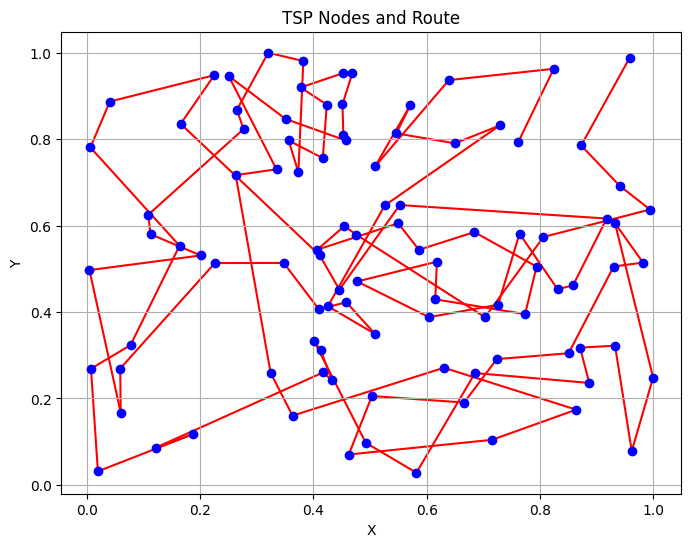

In [29]:
# HYPERPARAMETROS:

pop_size = 100 #cantidad de soluciones (población o genomas)
N = 100 #cantidad de ciudades
elite_size = 10 #elite de soluciones que se mantiene en cada generación
mutation_rate = 0.01 #probabilidad para la mutación de cada hijo
generations = 1000 #cantidad de generaciones o iteraciones


cities = np.random.rand(N, 2) #matriz de coordenadas para cada ciudad
distances = squareform(pdist(cities, 'euclidean'))

best_route, best_distance, history = genetic_algorithm_experiment1(distances, mutation_rate, generations)
plot_tsp(cities, best_route)

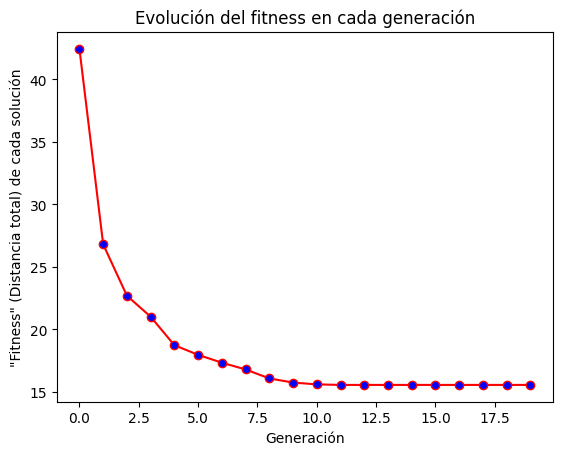

In [33]:
#
plt.plot(history, marker='o', linestyle='-', color='red', markerfacecolor='blue')
plt.xlabel('Generación')
plt.ylabel('"Fitness" (Distancia total) de cada solución')
plt.title('Evolución del fitness en cada generación')
plt.show()

In [ ]:
# prompt: I want to use the list "history" with the plot function and I want it to have dots in each point, line must be red, dots must be blue

import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
import random

# ... (rest of your code)

plt.plot([x[0] for x in history], marker='o', linestyle='-', color='red', markerfacecolor='blue')
plt.xlabel('Generación')
plt.ylabel('"Fitness" (Distancia total) de cada solución')
plt.title('Evolución del fitness en cada generación')
plt.show()

In [27]:
history

[[0, 44.947198756392325],
 [50, 30.70522938885807],
 [100, 25.157199681613466],
 [150, 21.867958690926873],
 [200, 19.828155170694867],
 [250, 17.834289860879156],
 [300, 16.951100302301413],
 [350, 16.244133946250443],
 [400, 16.00803546591456],
 [450, 15.8453698758307],
 [500, 15.540450758320562],
 [550, 15.540450758320562],
 [600, 15.455569437396322],
 [650, 15.328790203378304],
 [700, 15.328790203378304],
 [750, 14.580528561665984],
 [800, 14.15302463933237],
 [850, 13.936600738952187],
 [900, 13.617258572900091],
 [950, 13.141142436221392],
 [1000, 13.019881688508551],
 [1050, 13.013936202499583],
 [1100, 12.808529548055574],
 [1150, 12.787916684565394],
 [1200, 12.552349486151222],
 [1250, 12.552349486151222],
 [1300, 12.39516645226781],
 [1350, 12.39516645226781],
 [1400, 12.26944093111604],
 [1450, 12.254751823264112],
 [1500, 12.209919805240018],
 [1550, 12.103371547533982],
 [1600, 12.097423442951577],
 [1650, 11.99087518524554],
 [1700, 11.890455428966245],
 [1750, 11.721547